In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Q.1 Predicting Price of House using KNearestNeighbour Regressor

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [ ]:
#1.Use pandas to get some insights into the data 

In [4]:
print(df.head())


   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  


In [5]:
print(df.describe())

       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   
50%    326.000000  1423.200000    5.000000   12.000000    3.000000   
75%    487.000000  1892.856000    8.000000   14.000000    4.000000   
max    648.000000  5856.468000   22.000000   38.000000    7.000000   

       Living.Room    Bathroom          Price  
count   645.000000  645.000000     645.000000  
mean      1.813953    1.810853   61986.823256  
std       0.462364    0.683574   35635.091007  
min       0.000000    0.000000    6100.000000  
25%       2.000000    1.000000   39000.000000  
50%       2.000000    2.000000   50000.000000  
75%       2.000000    2.000000   

In [21]:
print(df.columns)
print(df.index)

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')
RangeIndex(start=0, stop=645, step=1)


In [ ]:
#2.Show some interesting visualization of the data

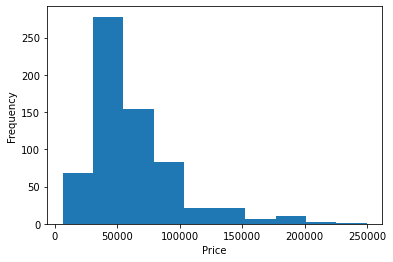

In [22]:
plt.hist(df['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

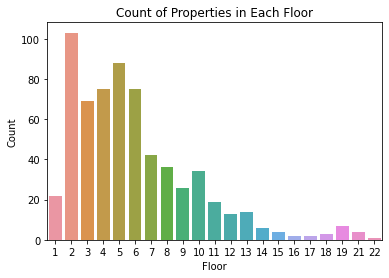

In [15]:
sns.countplot(x='Floor', data=df)
plt.xlabel('Floor')
plt.ylabel('Count')
plt.title('Count of Properties in Each Floor')
plt.show()



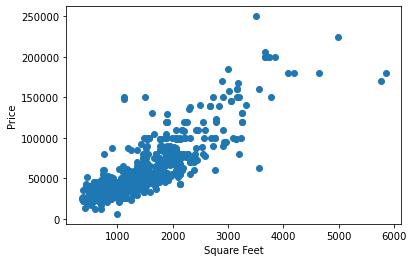

In [18]:
plt.scatter(df['Sqft'], df['Price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

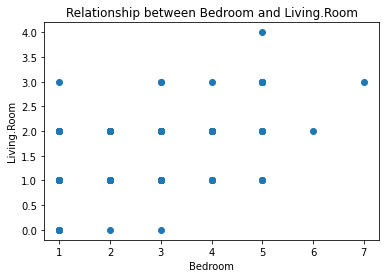

In [19]:
plt.scatter(df['Bedroom'], df['Living.Room'])
plt.xlabel('Bedroom')
plt.ylabel('Living.Room')
plt.title('Relationship between Bedroom and Living.Room')
plt.show()

In [ ]:
#3. Manage data for training & testing

In [27]:
X = df[['Sqft', 'Floor', 'TotalFloor']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


RMSE: 20595.54703337668


In [28]:
X = df.drop(['Price'], axis=1)  
y = df['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 444341095.2750387


In [ ]:
#4.Finding a better value of k

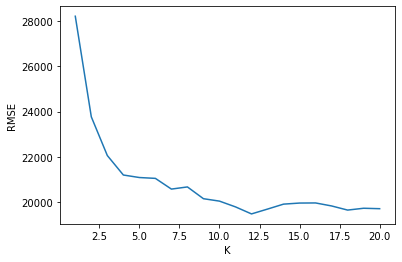

In [30]:
rmse_list = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    
plt.plot(range(1, 21), rmse_list)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

# Q2 Cluster similar Houses

In [39]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [ ]:
#1. Data cleaning & getting rid of irrelevant information before clustering

In [34]:
data = df.drop(['Unnamed: 0', 'Sqft'], axis=1)
data

,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,2,7,2,2,2,62000
1,5,7,4,2,2,78000
2,5,7,2,2,1,58000
3,2,7,3,2,2,45000
4,11,14,3,2,2,45000
...,...,...,...,...,...,...
640,7,15,3,2,2,45000
641,4,10,1,1,1,24800
642,13,14,1,1,1,45000
643,3,14,3,2,2,65000


In [37]:
data = df.dropna()
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [ ]:
#2. Finding the optimal value of k

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


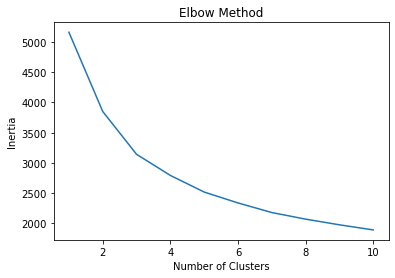

In [43]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#3. Storing cluster to which the house belongs along with the data

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
clusters = kmeans.predict(data_scaled)

# Storing the clusters with the data
data['Cluster'] = clusters
for i in range(3):
    print(f'Cluster {i}:')
    print(data[data['Cluster'] == i])
    print('\n')

Cluster 0:
     Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
5             6  1127.886     11          12        4            2         2   
12           13  1352.040      9          19        4            2         2   
14           15  2134.800     10          19        3            2         2   
15           16  2768.124      6          19        3            2         2   
18           19  2739.660      6          19        3            2         2   
..          ...       ...    ...         ...      ...          ...       ...   
624         628  1885.740      8          13        3            2         2   
633         637  2042.292      6          18        2            2         2   
635         639  1889.298     18          21        3            2         2   
638         642  1707.840      9          15        3            2         2   
639         643  2846.400      5          12        4            2         2   

      Price  Cluster  
5    

In [52]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
clusters = kmeans.predict(data_scaled)

# Storing the clusters with the data
data['Cluster'] = clusters
print(data.head())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  Cluster  
0  62000        1  
1  78000        1  
2  58000        2  
3  45000        1  
4  45000        1  
